In [1]:
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv('fall2022Placement.csv')

In [3]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary,status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,270000.0,Placed
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,200000.0,Placed
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,250000.0,Placed
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,NaN,Not Placed
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,425000.0,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,400000.0,Placed
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,275000.0,Placed
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,295000.0,Placed
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,204000.0,Placed


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           213 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           214 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  214 non-null    object 
 12  mba_p           215 non-null    float64
 13  salary          148 non-null    float64
 14  status          215 non-null    object 
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


array([[<AxesSubplot:title={'center':'sl_no'}>,
        <AxesSubplot:title={'center':'ssc_p'}>,
        <AxesSubplot:title={'center':'hsc_p'}>],
       [<AxesSubplot:title={'center':'degree_p'}>,
        <AxesSubplot:title={'center':'etest_p'}>,
        <AxesSubplot:title={'center':'mba_p'}>],
       [<AxesSubplot:title={'center':'salary'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

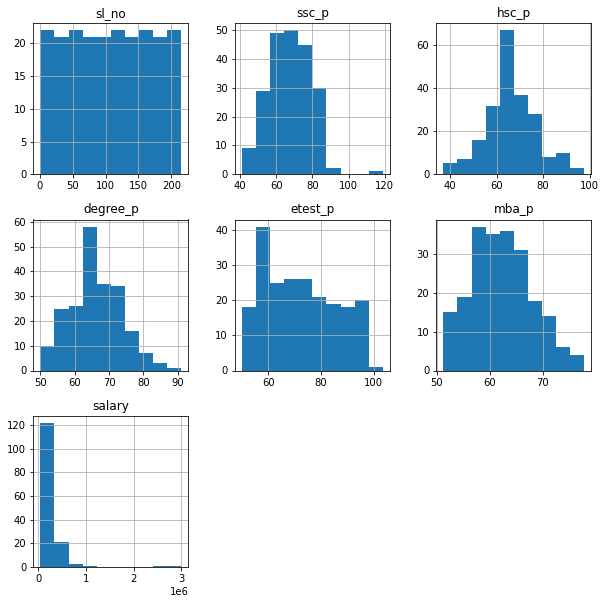

In [5]:
df.hist(figsize=(10,10))

# Cleansing data and Handling Outliers

1. cleanse
- fill nulls on Salary column with median that will neutralzie the data.
- fill nulls on hsc_p with meaningful value and for numerical data, we use median
- fill nulls on hsc_s and specialisation for categorical data using mode (based on the value that appears the most)

In [6]:
sal_med = df['salary'].median()
sal_med

265000.0

In [7]:
df['salary'].fillna(sal_med, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           213 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           214 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  214 non-null    object 
 12  mba_p           215 non-null    float64
 13  salary          215 non-null    float64
 14  status          215 non-null    object 
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [9]:
hsc_med = df['hsc_p'].median()
hsc_med

65.0

In [10]:
df['hsc_p'].fillna(hsc_med, inplace=True)

In [11]:
df['hsc_s'].fillna(df['hsc_s'].mode()[0], inplace=True)

In [12]:
df['specialisation'].fillna(df['specialisation'].mode()[0], inplace=True)

In [13]:
df = df.drop(38)
#remove sl_no 39 that has a typo on the specialisation column

In [14]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary,status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,270000.0,Placed
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,200000.0,Placed
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,250000.0,Placed
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,265000.0,Not Placed
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,425000.0,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,400000.0,Placed
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,275000.0,Placed
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,295000.0,Placed
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,204000.0,Placed


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           214 non-null    int64  
 1   gender          214 non-null    object 
 2   ssc_p           214 non-null    float64
 3   ssc_b           214 non-null    object 
 4   hsc_p           214 non-null    float64
 5   hsc_b           214 non-null    object 
 6   hsc_s           214 non-null    object 
 7   degree_p        214 non-null    float64
 8   degree_t        214 non-null    object 
 9   workex          214 non-null    object 
 10  etest_p         214 non-null    float64
 11  specialisation  214 non-null    object 
 12  mba_p           214 non-null    float64
 13  salary          214 non-null    float64
 14  status          214 non-null    object 
dtypes: float64(6), int64(1), object(8)
memory usage: 26.8+ KB


2. Outliers
- Using the IQR method to identify outliers and remove outliers from the dataframeS

In [16]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1

In [17]:
print(IQR)

sl_no         106.5000
ssc_p          15.1500
hsc_p          12.0000
degree_p       11.0000
etest_p        24.0000
mba_p           8.2175
salary      33750.0000
dtype: float64


In [18]:
IQE = Q3['etest_p'] - Q1['etest_p']

below = Q1['etest_p'] - 0.8 * IQE
above = Q3['etest_p'] + 0.8 * IQE

df.loc[(df['etest_p'] < below)  | (df['etest_p'] > above)]

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary,status
10,11,M,58.0,Central,61.0,Central,Commerce,60.0,Comm&Mgmt,Yes,103.4,Mkt&HR,60.85,260000.0,Placed


In [19]:
print(below,above)

40.8 103.2


In [21]:
#remove outlier above from the dataframe
df = df.drop(10)

In [22]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary,status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,270000.0,Placed
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,200000.0,Placed
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,250000.0,Placed
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,265000.0,Not Placed
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,425000.0,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,400000.0,Placed
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,275000.0,Placed
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,295000.0,Placed
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,204000.0,Placed


<function matplotlib.pyplot.show(close=None, block=None)>

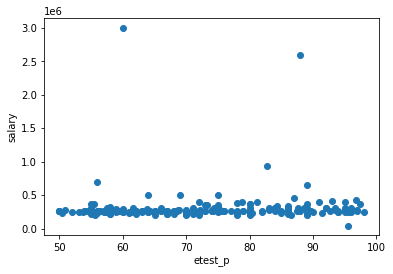

In [23]:
plt.scatter(df['etest_p'], df['salary'])
plt.xlabel('etest_p')
plt.ylabel('salary')
plt.show
#removing outliers by removing maximum values

# Visualization and Reporting

3. Who are these graduates?

In [24]:
#looking at data correlations between all variables
df.corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.051314,-0.100315,-0.095903,0.051532,0.015832,-0.110691
ssc_p,-0.051314,1.000000,0.475973,0.476459,0.219537,0.354009,0.075628
hsc_p,-0.100315,0.475973,1.000000,0.434215,0.238337,0.350026,0.017044
degree_p,-0.095903,0.476459,0.434215,1.000000,0.222731,0.402717,0.096827
etest_p,0.051532,0.219537,0.238337,0.222731,1.000000,0.212831,0.043984
mba_p,0.015832,0.354009,0.350026,0.402717,0.212831,1.000000,0.125906
salary,-0.110691,0.075628,0.017044,0.096827,0.043984,0.125906,1.000000


<AxesSubplot:>

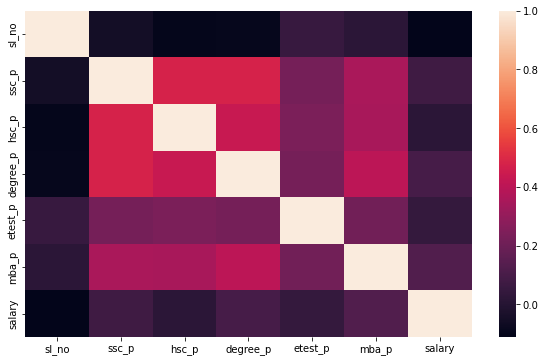

In [25]:
corrMatrix = df.corr()
plt.figure(figsize=(10,6))
sb.heatmap(corrMatrix)

In [26]:
correlation = df['ssc_p'].corr(df['degree_p'])
correlation

0.47645876273602733

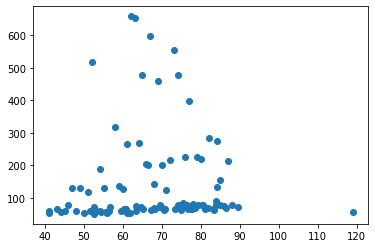

In [28]:
#There is Some Correlation between secondary education percentile and degree percentile
dfgr = df.groupby(['ssc_p'], as_index = False)['degree_p'].sum()
plt.scatter(dfgr['ssc_p'],dfgr['degree_p'])

In [29]:
#use bins to group the graduates based on their employability test
df['etestbin'] = pd.cut(df['etest_p'], bins = [50, 60, 70,80,90,100])

In [30]:
df['etestbin'] = pd.cut(df['etest_p'], [50, 60, 70,80,90,100], labels=['50-60','61-70','71-80','81-90','91-100'])

In [31]:
df_grp = df.groupby(df['etestbin']).size()

In [32]:
df_grp

etestbin
50-60     55
61-70     47
71-80     47
81-90     36
91-100    25
dtype: int64

<AxesSubplot:title={'center':'Employability test percentile by group'}, ylabel='Percentage'>

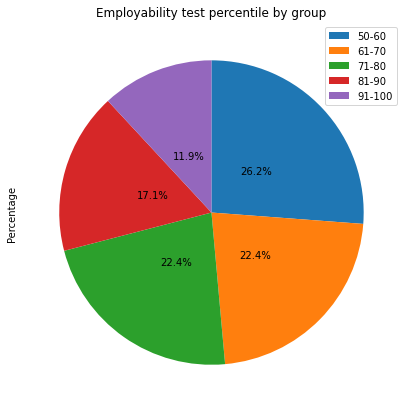

In [33]:
#display  Employability test percentile by group
#nearly 50% of the graduates ranked above the 70th percentile
df_grp.plot(kind='pie', autopct='%1.1f%%',
                    title='Employability test percentile by group',
                    figsize=(7,7),
                    legend=True,
                    startangle=90, counterclock=False,
                    pctdistance=0.4,
                    label='Percentage',
                    labels=None)

[Text(0.5, 1.0, 'Average Salary by Degree Type among Male & Female Graduates')]

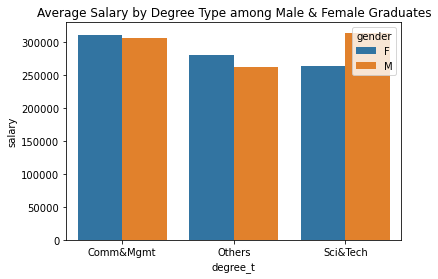

In [34]:
#looking at the average salary by Degree type among Male and Female graduates
dfgrpsal =df.groupby(['degree_t','gender'],as_index=False)['salary'].mean()
sb.barplot(x="degree_t",
           y="salary",
           hue= 'gender', 
           data=dfgrpsal).set(title='Average Salary by Degree Type among Male & Female Graduates')

[Text(0.5, 1.0, 'Average Salary by Specialisation')]

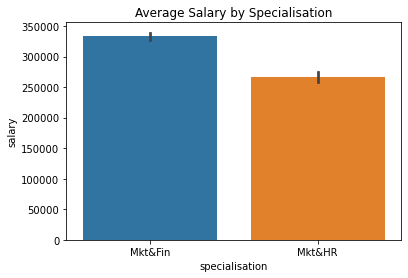

In [36]:
#Average salary by Specialisation
dfgrpsal2 =df.groupby(['specialisation','gender'],as_index=False)['salary'].mean()
sb.barplot(x="specialisation",
           y="salary", 
           data=dfgrpsal2).set(title='Average Salary by Specialisation')

4. Who are most likely getting placed?

In [37]:
df_placed = df.loc[(df['status']=='Placed')]
df_placed

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary,status,etestbin
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,270000.0,Placed,50-60
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,200000.0,Placed,81-90
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,250000.0,Placed,71-80
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,425000.0,Placed,91-100
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,252000.0,Placed,61-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,M,62.00,Central,72.00,Central,Commerce,65.00,Comm&Mgmt,No,67.0,Mkt&Fin,56.49,216000.0,Placed,61-70
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,400000.0,Placed,91-100
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,275000.0,Placed,71-80
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,295000.0,Placed,50-60


Text(0.5, 1.0, 'Average Degree Percentile of Graduates by Status')

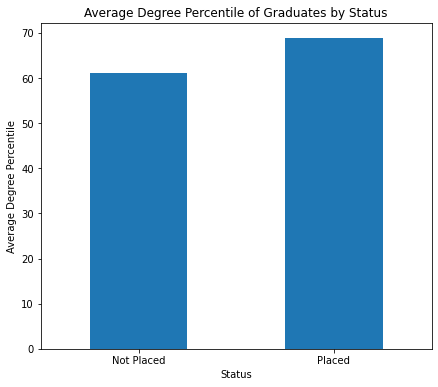

In [39]:
df.groupby(['status'])['degree_p'].mean().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel('Status')
plt.ylabel('Average Degree Percentile')
plt.title('Average Degree Percentile of Graduates by Status')

Text(0.5, 1.0, 'Graduates by Degree that Placed')

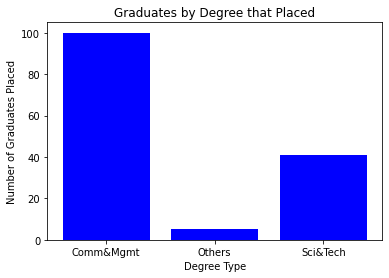

In [40]:
df_grp_major =df_placed.groupby(['degree_t'],as_index=False)['degree_p'].count()
plt.bar(df_grp_major['degree_t'], df_grp_major['degree_p'], color = 'b')
plt.xlabel('Degree Type')
plt.ylabel('Number of Graduates Placed')
plt.title('Graduates by Degree that Placed')

[Text(0.5, 1.0, 'Average Salary of Graduates who are placed by their Work Experiences')]

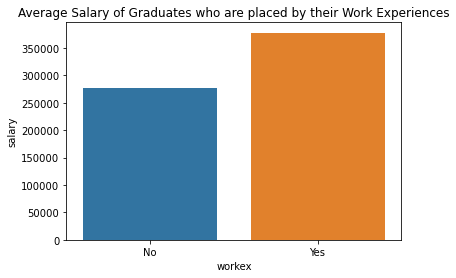

In [41]:
df_pw =df_placed.groupby(['workex'],as_index=False)['salary'].mean()
sb.barplot(x="workex",
           y="salary", 
           data=df_pw).set(title='Average Salary of Graduates who are placed by their Work Experiences')

# Regressions

Changing categorical data into Ordinal and Binary

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [43]:
df.loc[df['status']=='Placed', 'status'] = 1
df.loc[df['status']=='Not Placed', 'status'] = 0

In [44]:
df.loc[df['gender']=='M', 'gender'] = 1
df.loc[df['gender']=='F', 'gender'] = 0

In [45]:
df.loc[df['ssc_b']=='Central', 'ssc_b'] = 1
df.loc[df['ssc_b']=='Others', 'ssc_b'] = 0

In [46]:
df.loc[df['hsc_b']=='Central', 'hsc_b'] = 1
df.loc[df['hsc_b']=='Others', 'hsc_b'] = 0

In [47]:
df.loc[df['hsc_s']=='Commerce', 'hsc_s'] = 1
df.loc[df['hsc_s']=='Science', 'hsc_s'] = 2
df.loc[df['hsc_s']=='Arts', 'hsc_s'] = 3

In [48]:
df.loc[df['degree_t']=='Sci&Tech', 'degree_t'] = 1
df.loc[df['degree_t']=='Comm&Mgmt', 'degree_t'] = 2
df.loc[df['degree_t']=='Others', 'degree_t'] = 3

In [50]:
df.loc[df['workex']=='Yes', 'workex'] = 1
df.loc[df['workex']=='No', 'workex'] = 0

In [51]:
df.loc[df['specialisation']=='Mkt&HR', 'specialisation'] = 1
df.loc[df['specialisation']=='Mkt&Fin', 'specialisation'] = 2
df.loc[df['specialisation']=='Mt&HR', 'specialisation'] = 1

In [52]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary,status,etestbin
0,1,1,67.00,0,91.00,0,1,58.00,1,0,55.0,1,58.80,270000.0,1,50-60
1,2,1,79.33,1,78.33,0,2,77.48,1,1,86.5,2,66.28,200000.0,1,81-90
2,3,1,65.00,1,68.00,1,3,64.00,2,0,75.0,2,57.80,250000.0,1,71-80
3,4,1,56.00,1,52.00,1,2,52.00,1,0,66.0,1,59.43,265000.0,0,61-70
4,5,1,85.80,1,73.60,1,1,73.30,2,0,96.8,2,55.50,425000.0,1,91-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,0,82.00,0,1,77.60,2,0,91.0,2,74.49,400000.0,1,91-100
211,212,1,58.00,0,60.00,0,2,72.00,1,0,74.0,2,53.62,275000.0,1,71-80
212,213,1,67.00,0,67.00,0,1,73.00,2,1,59.0,2,69.72,295000.0,1,50-60
213,214,0,74.00,0,66.00,0,1,58.00,2,0,70.0,1,60.23,204000.0,1,61-70


In [53]:
df = df.drop(columns = ['etestbin'])

In [54]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary,status
0,1,1,67.00,0,91.00,0,1,58.00,1,0,55.0,1,58.80,270000.0,1
1,2,1,79.33,1,78.33,0,2,77.48,1,1,86.5,2,66.28,200000.0,1
2,3,1,65.00,1,68.00,1,3,64.00,2,0,75.0,2,57.80,250000.0,1
3,4,1,56.00,1,52.00,1,2,52.00,1,0,66.0,1,59.43,265000.0,0
4,5,1,85.80,1,73.60,1,1,73.30,2,0,96.8,2,55.50,425000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,0,82.00,0,1,77.60,2,0,91.0,2,74.49,400000.0,1
211,212,1,58.00,0,60.00,0,2,72.00,1,0,74.0,2,53.62,275000.0,1
212,213,1,67.00,0,67.00,0,1,73.00,2,1,59.0,2,69.72,295000.0,1
213,214,0,74.00,0,66.00,0,1,58.00,2,0,70.0,1,60.23,204000.0,1


In [61]:
df = df.astype({'status':int, 'gender':int, 'ssc_b':int, 
                'hsc_b':int, 'hsc_s':int, 'degree_t':int,
               'workex':int, 'specialisation':int})

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           213 non-null    int64  
 1   gender          213 non-null    int32  
 2   ssc_p           213 non-null    float64
 3   ssc_b           213 non-null    int32  
 4   hsc_p           213 non-null    float64
 5   hsc_b           213 non-null    int32  
 6   hsc_s           213 non-null    int32  
 7   degree_p        213 non-null    float64
 8   degree_t        213 non-null    int32  
 9   workex          213 non-null    int32  
 10  etest_p         213 non-null    float64
 11  specialisation  213 non-null    int32  
 12  mba_p           213 non-null    float64
 13  salary          213 non-null    float64
 14  status          213 non-null    int32  
dtypes: float64(6), int32(8), int64(1)
memory usage: 20.0 KB


In [62]:
X = df

In [63]:
X = X.drop('status', axis=1)

In [64]:
y = df['status']

In [65]:
lr = LogisticRegression()

In [66]:
lr.fit(X,y)

LogisticRegression()

In [68]:
#use all data to see how the model fit and ~85% of the data was explained by this model
lr.score(X,y)

0.8544600938967136

In [69]:
#split data into training and test sets.
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=.3, random_state=42)

In [70]:
X_train.shape

(149, 14)

In [72]:
y_train.shape

(149,)

In [73]:
X_test.shape

(64, 14)

In [74]:
lr.fit(X_train,y_train)

LogisticRegression()

In [75]:
#use train data to see how the model fit and ~86% of the data was explained by this model
lr.score(X_train,y_train)

0.8657718120805369

In [76]:
pred_train = lr.predict(X_train)

In [77]:
cmtx = pd.DataFrame(
    metrics.confusion_matrix(y_train,pred_train),  
    index=['actual:yes', 'actual:no'], 
    columns=['pred:yes', 'pred:no']
)
print(cmtx)

            pred:yes  pred:no
actual:yes        36       13
actual:no          7       93


In [78]:
#use test data onlyto see how the model fit and ~85% of the data was explained by this model
lr.score(X_test,y_test)

0.859375

In [79]:
pred_test = lr.predict(X_test)

In [80]:
cmtx = pd.DataFrame(
    metrics.confusion_matrix(y_test,pred_test),  
    index=['actual:yes', 'actual:no'], 
    columns=['pred:yes', 'pred:no']
)
print(cmtx)

            pred:yes  pred:no
actual:yes        12        6
actual:no          3       43
